# Data Wrangling

### Udacity Calssroom Project 4.

### This Project includes Twitter account for 'WeRateDogs'.

# Introduction
Real-world data rarely comes clean. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 
We will document our wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. 

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

# Software Needed


The following packages (libraries) is needed:
- pandas
- NumPy
- requests
- tweepy
- json
- os


We need to be able to create written documents that contain images and we need to be able to export these documents as PDF files. This task can be done in a Jupyter Notebook, but you might prefer to use a word processor like [Google Docs](https://www.google.com/docs/about/), which is free, or Microsoft Word.
A text editor, like [Sublime](https://www.sublimetext.com/), which is free, will be useful but is not required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os

# Project Details

Our tasks in this project doe Data wrangling, consists of:
- Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
- Assessing data
- Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations


### Gathering Data
loading the twitter-archive-enhanced.csv data inot the DataFrame

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Import image_predictions.tsv and check DataFrame file

In [4]:
image_predictions_url = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
for url in image_predictions_url:
    response = requests.get(url)
    with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)       


In [5]:
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))

response.status_code
200

response.headers['content-type']
'application/json; charset=utf8'

response.encoding
'utf-8'

'utf-8'

### Desply a limitted amount of of the requested data - 4000 rows

In [7]:
print(response.text[:4000])

tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog
666020888022790149	https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg	1	Welsh_springer_spaniel	0.465074	True	collie	0.156665	True	Shetland_sheepdog	0.0614285	True
666029285002620928	https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg	1	redbone	0.506826	True	miniature_pinscher	0.07419169999999999	True	Rhodesian_ridgeback	0.07201	True
666033412701032449	https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg	1	German_shepherd	0.596461	True	malinois	0.13858399999999998	True	bloodhound	0.11619700000000001	True
666044226329800704	https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg	1	Rhodesian_ridgeback	0.408143	True	redbone	0.360687	True	miniature_pinscher	0.222752	True
666049248165822465	https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg	1	miniature_pinscher	0.560311	True	Rottweiler	0.243682	True	Doberman	0.154629	True
666050758794694657	https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg	1	Bernese_mountain_dog	0.651137	True	English_spri

In [8]:
len(response.text)

335079

### Writing the Data File for image_predictions and reading it.

In [9]:
file = open('image_predictions.tsv', 'w')
file.write(response.text)
file.close()

In [10]:
df2 = pd.read_csv('image_predictions.tsv', delim_whitespace=True)
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Import & read 'twitter_api' file.
### Import & read 'twitter_json' file. 

- We will use the uspporting material provided by Udacity due to that fact that Twitter did not provide us with the verification and approval to Twitter Developers Portal as yet.
- twitter_api detailes as provided by Udacity calssroom attached below. Please for all students to read carfully and understand details before appliying it.


In [12]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:

    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [13]:
df3 = pd.read_json('tweet_json.txt', lines=True)

### Checking the file

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

### Selecting the three columns needed for later on merge with master files and dropping the rest.
    - Following Udacity procedures, we will keep only three columns
        - id
        - favourite_count
        - retweet_count

In [16]:
df3.drop(['contributors', 'coordinates', 'created_at', 'display_text_range', 'entities', 'extended_entities',
         'favorited', 'full_text', 'geo', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
         'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place', 'possibly_sensitive',
         'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 
         'quoted_status_permalink', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user'], axis=1, inplace=True)

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
id                2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


### Renaming the selected three columns 

In [18]:
df3.rename(columns = {'id' : 'tweet_id', 'favorite_count' : 'favorite', 'retweet_count' : 'retweet'}, inplace=True)

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite    2331 non-null int64
tweet_id    2331 non-null int64
retweet     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


## Assessing Data Files
    - tweeter_archive_enhanced represented as df1
    - image_predictions represented as df2
    - tweet_json represented as df3

## We will use the two available means for the assessment:
    - The Visual assessment.
    - The Programmatic assessment.

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Checking datatype and missings.

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Visual assessment - reading df1.

In [22]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844979544...,13,10,None,None,None,None,None
2281,667369227918143488,NaN,NaN,2015-11-19 15:49:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a neat pup. Very white. Cool shad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667369227...,10,10,None,None,None,None,None
510,812372279581671427,NaN,NaN,2016-12-23 19:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moe. He's a fetty woof. Got a cardboar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812372279...,13,10,Moe,None,None,None,None
1829,676237365392908289,NaN,NaN,2015-12-14 03:08:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676237365...,8,10,Winston,None,None,None,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None


In [24]:
df1[['doggo', 'floofer', 'pupper', 'puppo']].head(210)

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


__There might be an issue with data quality and tidiness.__

## Checking if the dog category has more the one by row.

In [25]:
def check_multiple_categories(df):
    category_check_list = []
    for index, row in df.iterrows():
        count = 0

        if row['doggo'] == 'doggo':
            count += 1
        if row['floofer'] == 'floofer':
            count += 1
        if row['pupper'] == 'pupper':
            count += 1
        if row['puppo'] == 'puppo':
            count += 1
        if count > 1:
            category_check_list.append(index)

    return category_check_list

In [26]:
check_multiple_categories(df1)

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

__There is an issue with multiple category rows__

## Testing whether the missing expanded URLs are a problem.
    - If there is a link in the tweet's text and no expanded URL then there is an issue

In [27]:
test = df1[df1['expanded_urls'].isnull()]
test['text'].str.contains('http').sum()

#No issue there. Every tweet with an url has an expanded URL. 
#Those without one are usually retweets or replies.

0

No issue there. Every tweet with an url has an expanded URL. 
Those without one are usually retweets or replies.

In [28]:
df1.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [29]:
sum(df1.tweet_id.duplicated())

0

__No id duplicates, which is good__

In [30]:
df1.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
605        1
1446       1
1869       1
2091       1
2038       1
1940       1
1764       2
2310       2
1761       2
1920       2
2246       2
2237       2
2349       2
2326       2
2079       2
2305       3
1249       3
1898       3
1478       3
1692       3
2202       3
765        3
1928       3
1314       3
2183       3
        ... 
866       14
83        14
291       15
285       15
55        17
1663      20
516       24
1712      26
763       27
1433      44
1274      45
1202      50
1351      60
340       75
695       75
1254      80
433       84
1843      88
1228      99
1635     121
1634     143
1779     144
902      165
290      182
1120     204
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [31]:
df1.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
1574     10
1573     10
1572     10
1563     10
1570     10
1569     10
1568     10
1567     10
1566     10
1565     10
1564     10
1577     10
1571     10
0        10
1562     10
1547     10
1548     10
1549     10
1550     10
1551     10
1552     10
1553     10
1554     10
1555     10
1556     10
       ... 
782      10
781      10
775      10
799      10
780      10
779      10
776      10
777      10
778      10
800      10
784      11
1068     11
1662     11
342      15
1663     16
1165     20
1598     20
1433     40
1202     50
1351     50
1274     50
433      70
1843     80
1254     80
1228     90
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

**Every numerator not other than 10-14 in the dogs rating is a possible quality issue.**


In [32]:
sum(df1['rating_numerator'] > 14), sum(df1['rating_numerator'] <10)

(28, 440)

In [33]:
df1.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

**Every denominator other than 10 in the dogs rating is a possible quality issue.**

In [34]:
sum(df1['rating_denominator'] > 10), sum(df1['rating_denominator'] < 10)

(20, 3)

In [35]:
df1.rating_denominator.value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

### The normal practice for WeRateDrogs is to have numerator 10-14, while deminator should be at 10.
    - it is clear that some did have some exceptions !

In [36]:
len(df1[df1['rating_denominator'] > 10] + df1[df1['rating_numerator'] > 14])

34

In [37]:
df1[(df1['rating_denominator'] > 10) & (df1['rating_numerator'] > 14)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [38]:
sum(df1.name.isnull())

0

In [39]:
list(zip(df1['name'].value_counts().keys(), df1['name'].value_counts()))

[('None', 745),
 ('a', 55),
 ('Charlie', 12),
 ('Cooper', 11),
 ('Lucy', 11),
 ('Oliver', 11),
 ('Lola', 10),
 ('Penny', 10),
 ('Tucker', 10),
 ('Winston', 9),
 ('Bo', 9),
 ('Sadie', 8),
 ('the', 8),
 ('Toby', 7),
 ('Buddy', 7),
 ('Bailey', 7),
 ('an', 7),
 ('Daisy', 7),
 ('Jack', 6),
 ('Leo', 6),
 ('Rusty', 6),
 ('Stanley', 6),
 ('Scout', 6),
 ('Dave', 6),
 ('Jax', 6),
 ('Bella', 6),
 ('Milo', 6),
 ('Oscar', 6),
 ('Koda', 6),
 ('Larry', 5),
 ('Chester', 5),
 ('Bentley', 5),
 ('Gus', 5),
 ('George', 5),
 ('Phil', 5),
 ('Alfie', 5),
 ('Louis', 5),
 ('Oakley', 5),
 ('Finn', 5),
 ('Sammy', 5),
 ('Sunny', 5),
 ('very', 5),
 ('Maximus', 4),
 ('Reggie', 4),
 ('Moose', 4),
 ('Dexter', 4),
 ('Clarence', 4),
 ('Winnie', 4),
 ('Riley', 4),
 ('Archie', 4),
 ('Jeffrey', 4),
 ('Gerald', 4),
 ('Reginald', 4),
 ('Bruce', 4),
 ('Boomer', 4),
 ('Scooter', 4),
 ('one', 4),
 ('Luna', 4),
 ('Maddie', 4),
 ('just', 4),
 ('Brody', 4),
 ('Sampson', 4),
 ('Clark', 4),
 ('Carl', 4),
 ('quite', 4),
 ('Beau', 4)

## Some names are incorrect and others are not registered.
    - None registered names count to 745
    - 55 dog names are registered as 'a'
    - one dog name is wrongly registered as 'O'
    - two dog names are registered as 'not'
    - Need to correct this in the cleanning session

In [40]:
df1.loc[df1['name']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [41]:
df1.loc[df1['name']=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [42]:
df1.loc[df1['name']=='O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [43]:
df1.loc[df1['name']=='not']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [45]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [46]:
df2[['p1_conf', 'p2_conf', 'p3_conf']].sort_values(by='p1_conf')

,p1_conf,p2_conf,p3_conf
38,0.044333,4.320930e-02,3.890560e-02
136,0.055379,5.432210e-02,5.191340e-02
1093,0.059033,3.829900e-02,3.552820e-02
1370,0.063152,4.669210e-02,4.627680e-02
246,0.070076,6.253600e-02,5.889360e-02
250,0.071124,6.839780e-02,6.696390e-02
145,0.071536,5.445480e-02,4.502800e-02
680,0.072885,5.786580e-02,5.325660e-02
701,0.081101,6.695660e-02,6.088370e-02
1831,0.082489,6.101650e-02,5.508610e-02


__The predictions DataFrame is the only one with numerical data. 
Using .describe() can help us check whether the ranges, means and quartiles make sense. Also to check for outliers.__

In [47]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In this test, we correctly see that the probability for the first guess has the largest value. We also see that the highest probability is equal to 1, which is expected

In [48]:
all_columns = pd.Series(list(df1) + list(df2) + list(df3))
all_columns[all_columns.duplicated()]

17    tweet_id
30    tweet_id
dtype: object

The only duplicated columns are the tweet_id.

We can deal with later later on.

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite    2331 non-null int64
tweet_id    2331 non-null int64
retweet     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [50]:
df3.head()

,favorite,tweet_id,retweet
0,35349,892420643555336193,7462
1,30591,892177421306343426,5537
2,23018,891815181378084864,3662
3,38638,891689557279858688,7630
4,36911,891327558926688256,8229


In [51]:
df3.tail()

,favorite,tweet_id,retweet
2326,95,666049248165822465,39
2327,264,666044226329800704,124
2328,108,666033412701032449,39
2329,118,666029285002620928,41
2330,2356,666020888022790149,448


In [52]:
df3.describe()

,favorite,tweet_id,retweet
count,2331.000000,2.331000e+03,2331.000000
mean,7384.768769,7.419079e+17,2621.456885
std,11470.435619,6.823170e+16,4434.893787
min,0.000000,6.660209e+17,1.000000
25%,1283.500000,6.782670e+17,531.500000
50%,3205.000000,7.182469e+17,1224.000000
75%,9032.500000,7.986692e+17,3042.500000
max,152289.000000,8.924206e+17,75309.000000


# Issues to address

### Quality Issues

tweet_archive_enhanced


- The Tweet_id type should change to str instead of int.
- 745 Empty names for for dogs.Cannot do anything here
- 55 dog names as 'a' wich is not correct; Validy issue
- Dog name for tweet_id number 776201521193218049 should be changed to O'Malley instead of O.
- Dog names for tweet_id 832645525019123713 and 748977405889503236 should be changed to np.NaN instead of 'not'.
- The dog name columns is set as None and it should be np.NaN.
- The timestamp is better to be changed to datetime in DataFrame 
- There are 14 rows with multiple categories and need to be cleaned or dropped; validity issue.
- There are numenator and denominator numbers are incorrect, and best porgrammatic solution is to look for the mean and use it. 
- The DataFrame for dog name and the four development categories need to be changed to Category instead of Object.
- Uniform the capitalization of the p1, p2, and p3 column values and replace underscores with spaces.


image_predictions

- tweet_id should be a str not an int.

tweet_json

- Tweet_id should be str and not int.

## Tidy issues

tweet_rchive_enhanced - df1


- Some of the columns can be dropped like 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.
- We have four dog development category and should be grouped under one category; Each variable from a column
- Some of colums like rating_numerator and rating_denominator are not set properly are reduntant and can be dropped without effecting Data output.

Image_predictions - df2

- does not reflect any use unless it is merged with another DataFrame; should merge it with tweet_archive_enhanced

Tweet_text (tweet_json) - df3

- Also it is best to merge this DataFrame with the above ones to create a better advanced and cleaned Data File.

# Cleaning Process - Quality issues

## Copying the data files we need to clean.

In [53]:
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

Define

_Change the tweet id for the three data frames into a str_

Code

In [54]:
df1_clean.tweet_id = df1_clean.tweet_id.astype(str)
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)
df3_clean.tweet_id = df3_clean.tweet_id.astype(str)

Test Code

In [55]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [56]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [57]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite    2331 non-null int64
tweet_id    2331 non-null object
retweet     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


Define

_The 745 empty dog names cannot be resolved, so we will keep them as is, but we will change the None into np.NaN_

Code

In [58]:
df1_clean.name = df1_clean.name.replace('None', np.nan)

Test Code

In [59]:
df1_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Define 

_Replace numerator above 14 to mean() value and numerator below 10 to lower mean value()_

In [60]:
above_average = df1_clean.loc[df1_clean['rating_numerator'] > 14]
above_average

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,NaN,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,NaN,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,NaN,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,NaN,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,NaN,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [61]:
above_average['rating_numerator']

55        17
188      420
189      666
285       15
290      182
291       15
313      960
340       75
433       84
516       24
695       75
763       27
902      165
979     1776
1120     204
1202      50
1228      99
1254      80
1274      45
1351      60
1433      44
1634     143
1635     121
1663      20
1712      26
1779     144
1843      88
2074     420
Name: rating_numerator, dtype: int64

In [62]:
df1_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

_Since majority of numbers under 10_

In [63]:
below_average = df1_clean.loc[df1_clean['rating_numerator'] < 10]
below_average

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,NaN,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,NaN,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,NaN,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,NaN,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [64]:
above_average['rating_numerator'].mean(), below_average['rating_numerator'].mean()

(215.89285714285714, 7.163636363636364)

_Check the over all mean for comparison._

In [65]:
df1_clean.rating_numerator.mean()

13.126485568760611

_Since the overall mean of rating numerator is at 13, while the mean for the number > 14 is 215. We will consider that 14 is above average and we will chnage all numerators > 14 to 14_

In [66]:
df1_clean.loc[df1_clean['rating_numerator'] > 14, 'rating_numerator'] = 14 

_Test Code_

In [68]:
df1_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
14     82
7      55
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

_Since the average mean for the numerator under 10 is 7, we will go ahead and check the numerator mean under 7 for a better reflection._

In [69]:
below_seven = df1_clean.loc[df1_clean['rating_numerator'] < 7]
below_seven.mean()

tweet_id                             inf
in_reply_to_status_id       6.915669e+17
in_reply_to_user_id         4.196984e+09
retweeted_status_id         6.668263e+17
retweeted_status_user_id    4.246908e+09
rating_numerator            4.232000e+00
rating_denominator          1.009600e+01
dtype: float64

_Some numerator numbers < 2 while their denominator is below the accepted average of 10, so best approach is to change the numerator to thier numbers to the mean of numerator below < 7 _

In [70]:
df1_clean.loc[df1_clean['rating_numerator'] < 7, 'rating_numerator'] = 4 

_Test Code_

In [71]:
df1_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
4     125
8     102
14     82
7      55
Name: rating_numerator, dtype: int64

_Checking the denominator_

In [72]:
below_den_average = df1_clean.loc[df1_clean['rating_denominator'] < 10]
below_den_average

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,14,0,NaN,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",14,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,4,2,an,None,None,None,None


In [73]:
above_den_average = df1_clean.loc[df1_clean['rating_denominator'] > 10]
above_den_average

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,14,70,NaN,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,14,150,NaN,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,14,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,14,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,14,90,NaN,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,14,80,NaN,None,None,None,None


In [74]:
above_den_average['rating_denominator'].mean(), below_den_average['rating_denominator'].mean()

(64.700000000000003, 3.0)

_Best Approach is to change all denominators to 10_

In [75]:
df1_clean.loc[df1_clean['rating_denominator'] < 10, 'rating_denominator'] = 10
df1_clean.loc[df1_clean['rating_denominator'] > 10, 'rating_denominator'] = 10


_Test Code_

In [76]:
df1_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

Test Code

In [77]:
df1_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pilot. He has mastered the synchronize...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,doggo,None,None,None
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778039087...,12,10,NaN,None,None,pupper,None
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,NaN,None,None,None,None
1987,672877615439593473,NaN,NaN,2015-12-04 20:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's getting bombarded with the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672877615...,8,10,Oscar,None,None,None,None
1568,687818504314159109,NaN,NaN,2016-01-15 02:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",With great pupper comes great responsibility. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687818504...,12,10,NaN,None,None,pupper,None
570,801854953262350336,8.018543e+17,11856342.0,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11,10,NaN,None,None,None,None
933,753655901052166144,NaN,NaN,2016-07-14 18:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""The dogtor is in hahahaha no but seriously I'...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/753655901...,10,10,NaN,None,None,None,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None
1679,682032003584274432,NaN,NaN,2015-12-30 02:54:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ulysses. He likes holding hands and hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682032003...,11,10,Ulysses,None,None,None,None


Define

_Change dogs name from 'not' to 'np.nan ' and 'a' to 'np.nan '_

Code

In [78]:
df1_clean.name = df1_clean.name.replace('a', np.nan)
df1_clean.name = df1_clean.name.replace('not', np.nan)

Test Code

In [79]:
df1_clean[df1_clean['name']== 'not']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [80]:
df1_clean[df1_clean['tweet_id']== '667470559035432960']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2273,667470559035432960,NaN,NaN,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667470559...,11,10,NaN,None,None,None,None


Define

_Correct the name of the dog for tweet_id 776201521193218049 to O'Malley_

Code

In [81]:
df1_clean.name = df1_clean.name.replace('O','OMalley')

Test Code

In [82]:
df1_clean[df1_clean['tweet_id']== '776201521193218049']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,OMalley,None,None,None,None


Define

_Change DataFrame of timestamp to datetime_

Code

In [83]:
df1_clean['datetime'] = pd.to_datetime(df1_clean.timestamp)

Test Code

In [84]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,datetime
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29 16:00:24


Define

_Drop multiple category rows. Those are 14 rows in total_

In [85]:
delete_multi_rows = check_multiple_categories(df1_clean)
delete_multi_rows

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

In [86]:
df1_clean = df1_clean.drop(delete_multi_rows)

Test Code

In [87]:
check_multiple_categories(df1_clean)

[]

Define

_Chnage the DataFrame type for 'name', 'doggo', 'floofer', 'pupper', 'puppo' to category._

Code

In [88]:
df1_clean.name = df1_clean.name.astype('category')
df1_clean.doggo = df1_clean.doggo.astype('category')
df1_clean.floofer = df1_clean.floofer.astype('category')
df1_clean.pupper = df1_clean.pupper.astype('category')
df1_clean.puppo = df1_clean.puppo.astype('category')

Test Code

In [89]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2342 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2342 non-null object
source                        2342 non-null object
text                          2342 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2283 non-null object
rating_numerator              2342 non-null int64
rating_denominator            2342 non-null int64
name                          1548 non-null category
doggo                         2342 non-null category
floofer                       2342 non-null category
pupper                        2342 non-null category
puppo                         2342 non-null category
datetime             

## Cleaning Process - Tidy issues

Define

_Drop the unnecessary columns from df1 file_


Code

In [90]:
df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
         axis=1, inplace=True)

Test Code

In [91]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2342 non-null object
timestamp             2342 non-null object
source                2342 non-null object
text                  2342 non-null object
expanded_urls         2283 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  1548 non-null category
doggo                 2342 non-null category
floofer               2342 non-null category
pupper                2342 non-null category
puppo                 2342 non-null category
datetime              2342 non-null datetime64[ns]
dtypes: category(5), datetime64[ns](1), int64(2), object(5)
memory usage: 226.2+ KB


Define

_Melt the four columns of dog devlopment category_

_Before that we need to create another column for the unknown values - we will call it 'unknown'_

_Create a new DataFrame under the for the melt_

Code

In [92]:
df1_clean_new = df1_clean[['tweet_id','rating_numerator', 'rating_denominator', 'name', 
                             'doggo', 'floofer', 'pupper', 'puppo']].copy()

In [93]:
df1_clean_new.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,13,10,Phineas,None,None,None,None
1,892177421306343426,13,10,Tilly,None,None,None,None
2,891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,12,10,Franklin,None,None,None,None


In [94]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2342 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  1548 non-null category
doggo                 2342 non-null category
floofer               2342 non-null category
pupper                2342 non-null category
puppo                 2342 non-null category
dtypes: category(5), int64(2), object(1)
memory usage: 134.7+ KB


In [95]:
def u(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'unknown'
    else:
        val = 'None'
    return val

df1_clean_new['unknown'] = df1_clean_new.apply(u, axis=1)

In [96]:
df1_clean_new.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,unknown
0,892420643555336193,13,10,Phineas,None,None,None,None,unknown
1,892177421306343426,13,10,Tilly,None,None,None,None,unknown
2,891815181378084864,12,10,Archie,None,None,None,None,unknown
3,891689557279858688,13,10,Darla,None,None,None,None,unknown
4,891327558926688256,12,10,Franklin,None,None,None,None,unknown


In [97]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2342 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  1548 non-null category
doggo                 2342 non-null category
floofer               2342 non-null category
pupper                2342 non-null category
puppo                 2342 non-null category
unknown               2342 non-null object
dtypes: category(5), int64(2), object(2)
memory usage: 153.0+ KB


In [98]:
df1_clean_new.unknown = df1_clean_new.unknown.astype('category')

In [99]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2342 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  1548 non-null category
doggo                 2342 non-null category
floofer               2342 non-null category
pupper                2342 non-null category
puppo                 2342 non-null category
unknown               2342 non-null category
dtypes: category(6), int64(2), object(1)
memory usage: 137.1+ KB


In [100]:
df1_clean_new = pd.melt(df1_clean_new, id_vars =['tweet_id', 'name', 'rating_numerator','rating_denominator'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],
                     var_name = 'dog_stage', 
                    value_name = 'val_name')

In [101]:
df1_clean_new = df1_clean_new[df1_clean_new['val_name']!= 'None'].sort_values(by = ['tweet_id']).reset_index(drop=True)

In [102]:
df1_clean_new

,tweet_id,name,rating_numerator,rating_denominator,dog_stage,val_name
0,666020888022790149,NaN,8,10,unknown,unknown
1,666029285002620928,NaN,7,10,unknown,unknown
2,666033412701032449,NaN,9,10,unknown,unknown
3,666044226329800704,NaN,4,10,unknown,unknown
4,666049248165822465,NaN,4,10,unknown,unknown
5,666050758794694657,NaN,10,10,unknown,unknown
6,666051853826850816,an,4,10,unknown,unknown
7,666055525042405380,NaN,10,10,unknown,unknown
8,666057090499244032,NaN,9,10,unknown,unknown
9,666058600524156928,the,8,10,unknown,unknown


In [103]:
df1_clean_new = df1_clean_new.drop('val_name', axis=1)

In [104]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 5 columns):
tweet_id              2342 non-null object
name                  1548 non-null category
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
dog_stage             2342 non-null object
dtypes: category(1), int64(2), object(2)
memory usage: 125.3+ KB


Test Code

In [105]:
df1_clean_new.sample(10)

,tweet_id,name,rating_numerator,rating_denominator,dog_stage
1851,813202720496779264,NaN,11,10,doggo
1131,714214115368108032,NaN,13,10,unknown
1406,752568224206688256,NaN,9,10,unknown
956,699691744225525762,Dave,4,10,unknown
1362,748699167502000129,Tripp,11,10,unknown
1009,704480331685040129,Lucia,11,10,unknown
1227,729823566028484608,Stefan,13,10,unknown
400,673636718965334016,NaN,10,10,unknown
657,681193455364796417,Aspen,11,10,unknown
2232,871166179821445120,Dawn,12,10,unknown


Define

_Merge tweet text represented by df3_clean with the df1_clean_melt file._

Code

In [106]:
df1_clean_new = pd.merge(df1_clean_new, df3_clean, on = 'tweet_id')

Test Code

In [107]:
df1_clean_new.head()

,tweet_id,name,rating_numerator,rating_denominator,dog_stage,favorite,retweet
0,666020888022790149,NaN,8,10,unknown,2356,448
1,666029285002620928,NaN,7,10,unknown,118,41
2,666033412701032449,NaN,9,10,unknown,108,39
3,666044226329800704,NaN,4,10,unknown,264,124
4,666049248165822465,NaN,4,10,unknown,95,39


Define

_Merge the data in file df2_clean with the newest df1_clean_melt Data file._

In [108]:
df1_clean_new = pd.merge(df1_clean_new, df2_clean, on = 'tweet_id', how='left')

In [109]:
df1_clean_new

,tweet_id,name,rating_numerator,rating_denominator,dog_stage,favorite,retweet,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,NaN,8,10,unknown,2356,448,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,NaN,7,10,unknown,118,41,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,NaN,9,10,unknown,108,39,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,NaN,4,10,unknown,264,124,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,NaN,4,10,unknown,95,39,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,NaN,10,10,unknown,120,51,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1.0,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,an,4,10,unknown,1096,752,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1.0,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,NaN,10,10,unknown,403,214,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1.0,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,NaN,9,10,unknown,262,120,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1.0,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,the,8,10,unknown,103,51,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1.0,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [110]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2317 entries, 0 to 2316
Data columns (total 18 columns):
tweet_id              2317 non-null object
name                  1532 non-null category
rating_numerator      2317 non-null int64
rating_denominator    2317 non-null int64
dog_stage             2317 non-null object
favorite              2317 non-null int64
retweet               2317 non-null int64
jpg_url               2046 non-null object
img_num               2046 non-null float64
p1                    2046 non-null object
p1_conf               2046 non-null float64
p1_dog                2046 non-null object
p2                    2046 non-null object
p2_conf               2046 non-null float64
p2_dog                2046 non-null object
p3                    2046 non-null object
p3_conf               2046 non-null float64
p3_dog                2046 non-null object
dtypes: category(1), float64(4), int64(4), object(9)
memory usage: 377.8+ KB


## Saving the final merged file into a new DataFrame

In [210]:
df1_clean_new.to_csv('twitter_archive_master.csv', index=False)

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [212]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(30)

,tweet_id,name,rating_numerator,rating_denominator,dog_stage,favorite,retweet,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,NaN,8,10,unknown,2356,448,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,NaN,7,10,unknown,118,41,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,NaN,9,10,unknown,108,39,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,NaN,4,10,unknown,264,124,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,NaN,4,10,unknown,95,39,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,NaN,10,10,unknown,120,51,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1.0,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,an,4,10,unknown,1096,752,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1.0,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,NaN,10,10,unknown,403,214,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1.0,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,NaN,9,10,unknown,262,120,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1.0,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,the,8,10,unknown,103,51,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1.0,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


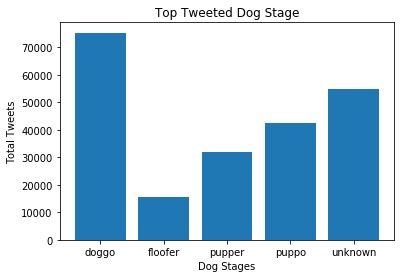

In [241]:
plt.bar(df.dog_stage, df.retweet, )
plt.title('Top tweets for dog Stage')
plt.title('Top Tweeted Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Total Tweets')
plt.legend();

Doggo is the most tweeted stage

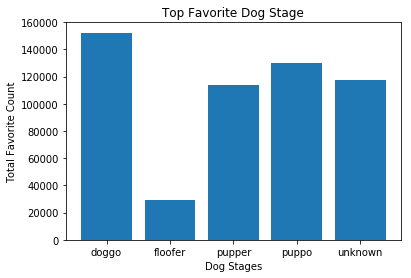

In [242]:
plt.bar(df.dog_stage, df.favorite)
plt.title('Top Favorite Dog Stage')
plt.xlabel('Dog Stages')
plt.ylabel('Total Favorite Count')
plt.legend();

Doggo is teh favorite stage as well for social media connections and sharing.

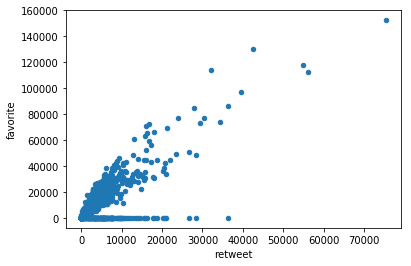

In [215]:
df.plot(x='retweet', y='favorite', kind='scatter');

The more favorite stage the more favorit tweets, stognly correlated.

In [216]:
df[['p1', 'p2', 'p3']] = df[['p1', 'p2', 'p3']].replace("_", " ", regex=True)

In [217]:
df.p1 = df.p1.str.title()
df.p2 = df.p2.str.title()
df.p3 = df.p3.str.title()


In [218]:
df.p1.value_counts()

Golden Retriever             144
Labrador Retriever            96
Pembroke                      88
Chihuahua                     81
Pug                           57
Chow                          44
Samoyed                       42
Pomeranian                    38
Toy Poodle                    38
Malamute                      30
Cocker Spaniel                30
French Bulldog                25
Miniature Pinscher            23
Chesapeake Bay Retriever      23
Seat Belt                     22
Siberian Husky                20
German Shepherd               20
Web Site                      19
Cardigan                      19
Maltese Dog                   18
Eskimo Dog                    18
Teddy                         18
Staffordshire Bullterrier     18
Shetland Sheepdog             18
Beagle                        18
Lakeland Terrier              17
Shih-Tzu                      17
Rottweiler                    17
Kuvasz                        16
Italian Greyhound             16
          

In [219]:
total_breeds = df.p1.value_counts()
top_10_breeds = total_breeds[0:10]
other_breeds = total_breeds[10:]

In [220]:
total_breeds

Golden Retriever             144
Labrador Retriever            96
Pembroke                      88
Chihuahua                     81
Pug                           57
Chow                          44
Samoyed                       42
Pomeranian                    38
Toy Poodle                    38
Malamute                      30
Cocker Spaniel                30
French Bulldog                25
Miniature Pinscher            23
Chesapeake Bay Retriever      23
Seat Belt                     22
Siberian Husky                20
German Shepherd               20
Web Site                      19
Cardigan                      19
Maltese Dog                   18
Eskimo Dog                    18
Teddy                         18
Staffordshire Bullterrier     18
Shetland Sheepdog             18
Beagle                        18
Lakeland Terrier              17
Shih-Tzu                      17
Rottweiler                    17
Kuvasz                        16
Italian Greyhound             16
          

In [224]:
top_10_breeds

Golden Retriever      144
Labrador Retriever     96
Pembroke               88
Chihuahua              81
Pug                    57
Chow                   44
Samoyed                42
Pomeranian             38
Toy Poodle             38
Malamute               30
Name: p1, dtype: int64

In [225]:
other_breeds

Cocker Spaniel                    30
French Bulldog                    25
Miniature Pinscher                23
Chesapeake Bay Retriever          23
Seat Belt                         22
Siberian Husky                    20
German Shepherd                   20
Web Site                          19
Cardigan                          19
Maltese Dog                       18
Eskimo Dog                        18
Teddy                             18
Staffordshire Bullterrier         18
Shetland Sheepdog                 18
Beagle                            18
Lakeland Terrier                  17
Shih-Tzu                          17
Rottweiler                        17
Kuvasz                            16
Italian Greyhound                 16
Great Pyrenees                    14
West Highland White Terrier       14
Pekinese                          13
Vizsla                            13
Basset                            13
Airedale                          12
Border Collie                     12
A

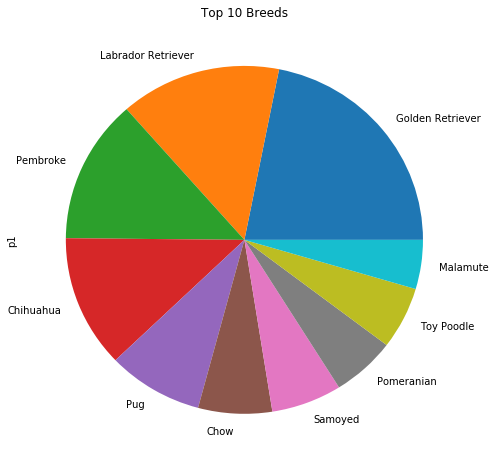

In [233]:
top_10_breeds.plot(kind='pie', figsize=(8,8), title='Top 10 Breeds');


The Data for Twitter_archives, image_predictions and tweets.text requires a lot of cleaning, from the datatype to the validy, acuracy and tidiness of the data provided in the first files.

There are more than 14 quality issues that need to be cleaned. And half of it need to be done by manually;
Probably one of the best way to clean data for dog names and their numerator and deminator numbers is manuualy, row by row. By checking and varifying text and tweets correlated with the scores on numerator and denominators a=to be able to clean its data.

Also there is the p2, p3, p2_dog, p3_dog that can be dropped easily from the master file, as their confidence level is less than p1_dog. We have measured and quantified that programmically. This should not affect the end result of our analysis.

To save time and specifically for the rating columns, I have used programmatic way to replace the mean with the wrong figures.
I have also used some logic doign that especially for the numerator figures below 10. 
You will notice here that there 440 rows with numerators below 10, but only fewer for those below 5 so I have used the lower mean number using the lower braket below the total mean level.


Overall, this was the most challenging and demonstrative worksheet I have learned a lot, slept a less, researched even more, but I hope I was able to cover all requirements for worksheet.


thanks
